In [1]:
#!pip install matplotlib
#!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
import scipy.optimize

In [3]:
linesMeas = []
linesTruth = []

for line in pd.read_csv('measurements.csv', ",", index_col=None, header=None, chunksize=1):
    linesMeas.append(line)
    
for line in pd.read_csv('groundtruth.csv', ",", index_col=None, header=None, chunksize=1):
    linesTruth.append(line)

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sigma = []
matrixM = []

# Create matrix M
for line in linesMeas:
    for i in line:
        matrixM.append(float(line[i]))
    matrixM.append(1)
    for j in range(12):
        matrixM.append(0)
    for i in line:
        matrixM.append(float(line[i]))
    matrixM.append(1)
    for j in range(12):
        matrixM.append(0)
    for i in line:
        matrixM.append(float(line[i]))
    matrixM.append(1)
    
matrixM = np.array(matrixM)
matrixM = matrixM.reshape(15600, 12)

# Create sigma
for line in linesTruth:
    for i in line:
        sigma.append(float(line[i]))
    
beta = np.matmul(np.linalg.pinv(matrixM), sigma)
print(beta)


[ 9.99389038e-01  3.49017510e-02  1.12915901e-06 -1.89392569e-01
 -3.48994183e-02  9.99390665e-01 -3.09984206e-07  3.06793769e-01
 -1.90617419e-05  3.69475621e-06  8.33268359e-01 -6.91834363e-04]


In [5]:
# Check with scipy.optimize.least_squares
betaGuess = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

def func(x):
    return sigma-np.matmul(matrixM, x)

res = scipy.optimize.least_squares(func, betaGuess)

print(res.x)

[ 9.99389038e-01  3.49017510e-02  1.12915900e-06 -1.89392569e-01
 -3.48994183e-02  9.99390665e-01 -3.09984208e-07  3.06793769e-01
 -1.90617354e-05  3.69473981e-06  8.33268359e-01 -6.91834441e-04]


In [6]:
# Create matrix A and offset vector b
matrixA = [beta[0], beta[1], beta[2], beta[4], beta[5], beta[6], beta[8], beta[9], beta[10]]
matrixA = np.array(matrixA)
matrixA = matrixA.reshape(3, 3)

print(matrixA)

vectorB = [beta[3], beta[7], beta[11]]
print(vectorB)

[[ 9.99389038e-01  3.49017510e-02  1.12915901e-06]
 [-3.48994183e-02  9.99390665e-01 -3.09984206e-07]
 [-1.90617419e-05  3.69475621e-06  8.33268359e-01]]
[-0.18939256891626532, 0.306793769419055, -0.0006918343626995949]


In [7]:
# Calibrate the measurements

calibratedMeasurements = []

for line in linesMeas:
    calibrated = np.matmul(line, matrixA) + vectorB
    calibratedMeasurements.append(calibrated)

In [8]:
truthX = []
truthY = []
truthZ = []
calibX = []
calibY = []
calibZ = []
measX = []
measY = []
measZ = []

for line in linesTruth:
    truthX.append(line[0])
    truthY.append(line[1])
    truthZ.append(line[2])
    
for line in calibratedMeasurements:
    calibX.append(line[0])
    calibY.append(line[1])
    calibZ.append(line[2])

for line in linesMeas:
    measX.append(line[0])
    measY.append(line[1])
    measZ.append(line[2])

Measured values (no calibration) vs. groundtruth

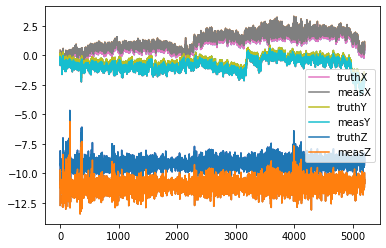

In [9]:
# Print original measurements and ground truth
plt.plot(truthX)
plt.plot(measX)
plt.plot(truthY)
plt.plot(measY)
plt.plot(truthZ)
plt.plot(measZ)

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
xTruth = plt.plot(truthX, label="truthX")
xMeas = plt.plot(measX, label="measX")
yTruth = plt.plot(truthY, label="truthY")
yMeas = plt.plot(measY, label="measY")
zTruth = plt.plot(truthZ, label="truthZ")
zMeas = plt.plot(measZ, label="measZ")
leg = plt.legend(loc=5)
plt.show()

Calibrated values vs. groundtruth

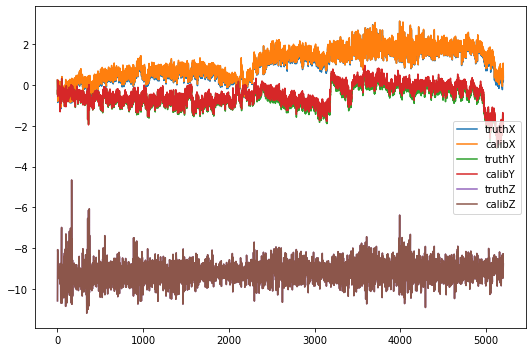

In [10]:
# Print calibrated measurements and ground truth
plt.clf()

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
xTruth = plt.plot(truthX, label="truthX")
xCalib = plt.plot(calibX, label="calibX")
yTruth = plt.plot(truthY, label="truthY")
yCalib = plt.plot(calibY, label="calibY")
zTruth = plt.plot(truthZ, label="truthZ")
zCalib = plt.plot(calibZ, label="calibZ")
leg = plt.legend(loc=5)
plt.show()

In [11]:
#Calculate Sum Squared Error

gTruthLen = []
calibLen = []
sumAll = 0

for line in linesTruth:
    gTruthLen.append(float(np.linalg.norm(line)))
    
for line in calibratedMeasurements:
    calibLen.append(float(np.linalg.norm(line)))
    
for i in range(len(gTruthLen)):
    sumAll = sumAll + np.square(gTruthLen[i]-calibLen[i])

print("SSE: ", sumAll)

SSE:  0.06827969988245174
